# 环境说明

In [10]:
!python -V

Python 3.11.5


In [6]:
import sklearn
import pandas
import numpy
import matplotlib

In [3]:
sklearn.__version__

'1.5.2'

In [4]:
pandas.__version__

'2.1.1'

In [7]:
numpy.__version__

'1.26.4'

In [14]:
matplotlib.__version__

'3.8.0'

# 代码实现

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [4]:
df = pd.read_csv("data/predict.csv")

In [5]:
df.head()

,origin_encoder,predict_encoder,predict_probability
0,0,1,0.506371
1,0,0,0.020811
2,0,0,0.028086
3,0,0,0.107581
4,0,0,0.045805


In [6]:
y_true = df['origin_encoder']  # 原始数据的真实数值，二分类
y_prob = df['predict_probability']  # 模型预测的概率，0到1之间

In [7]:
bool_y_true = np.array([True if i == 1 else False for i in y_true])
length = len(bool_y_true)
threshold_list = np.arange(0, 1, 0.01)

# 根据模型
model_pos_benefit_list = []
for threshold in threshold_list:
    threshold_y_pred = y_prob > threshold
    cm = confusion_matrix(bool_y_true, threshold_y_pred)
    tn, fp, fn, tp = cm.ravel()
    pos_benefit = (tp - fp * (threshold / (1 - threshold))) / length
    model_pos_benefit_list.append(pos_benefit)

# 全部治疗
treat_all_benefit_list = []
cm = confusion_matrix(bool_y_true, bool_y_true)
tn, fp, fn, tp = cm.ravel()
for threshold in threshold_list:
    treat_all_benefit = (tp - tn * (threshold / (1 - threshold))) / length
    treat_all_benefit_list.append(treat_all_benefit)

# 不治疗
treat_none_benefit_list = [0 for i in threshold_list]

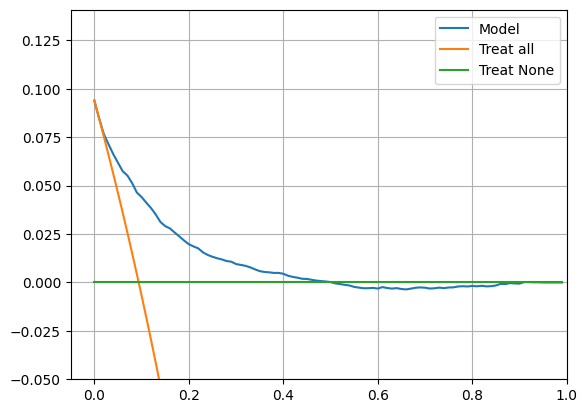

In [9]:
# 开始画图
plt.figure()
plt.plot(threshold_list, model_pos_benefit_list, label='Model')
plt.plot(threshold_list, treat_all_benefit_list, label='Treat all')
plt.plot(threshold_list, treat_none_benefit_list, label='Treat None')
y_max = (tp / length) * 1.5
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, y_max])
plt.grid('major')
plt.legend()

In [12]:
for i,j in zip(threshold_list, model_pos_benefit_list):
    print(i, j)

0.0 0.09390939093909391
0.01 0.08486505216178183
0.02 0.07667093239936239
0.03 0.0713638374146693
0.04 0.06628162816281628
0.05 0.06184302640790395
0.06 0.05743765865948297
0.07 0.055237781842700395
0.08 0.05129643399122521
0.09 0.04644420486004645
0.1 0.04411552266337745
0.11 0.04119850187265918
0.12 0.03840384038403841
0.13 0.03508166908644887
0.14 0.031200794498054456
0.15 0.029085261467323202
0.16 0.02791231504102791
0.17 0.025784506161459518
0.18 0.023768230481584746
0.19 0.02163796626576238
0.2 0.019751975197519752
0.21 0.018592998540360367
0.22 0.017591502740017594
0.23 0.015537917428106448
0.24 0.014206683826277365
0.25 0.01326799346601327
0.26 0.012490438233012489
0.27 0.011887490118874898
0.28 0.011062217332844394
0.29 0.01071797320577128
0.3 0.009500950095009501
0.31 0.009057427481878622
0.32 0.008589094203538001
0.33 0.007800780078007798
0.34 0.006767343401006764
0.35000000000000003 0.005862124674005859
0.36 0.005419291929192919
0.37 0.0052322692586718985
0.38 0.00491984682